## t-test 연습 2.

데이터 셋: https://www.kaggle.com/datasets/luiscorter/netflix-original-films-imdb-scores

위 데이터 셋은 넷플릭스 오리지널 시리즈의 메타 데이터와 평점을 담은 데이터 셋입니다. 지금까지 배운 시각화와 통계 기법들을 활용하여 넷플릭스의 데이터 분석가가 되었다고 생각하고 데이터를 통해서 인사이트를 전달해보세요.

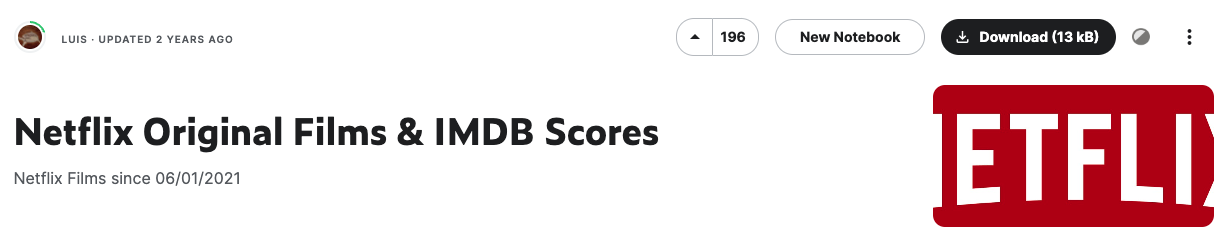

## 요구 사항
- 기본적인 EDA와 시각화를 해주세요. 
    -> 인사이트
- t-test 기법을 다양하게 사용해보세요.
- 통계적 근거를 활용하여 오리지널 시리즈 제작 방향에 대한 제언을 해보세요. 
- 결과물을 velog에 기록해주세요. (선택)

In [2]:
import pandas as pd
from matplotlib import pyplot as plt
import seaborn as sns

In [3]:
raw = pd.read_csv("./data/NetflixOriginals.csv")

In [4]:
df = raw[:]
df

,Title,Genre,Premiere,Runtime,IMDB Score,Language
0,Enter the Anime,Documentary,5.Aug.19,58,2.5,English/Japanese
1,Dark Forces,Thriller,21.Aug.20,81,2.6,Spanish
2,The App,Science fiction/Drama,26.Dec.19,79,2.6,Italian
3,The Open House,Horror thriller,19.Jan.18,94,3.2,English
4,Kaali Khuhi,Mystery,30.Oct.20,90,3.4,Hindi
...,...,...,...,...,...,...
579,Taylor Swift: Reputation Stadium Tour,Concert Film,31.Dec.18,125,8.4,English
580,Winter on Fire: Ukraine's Fight for Freedom,Documentary,9.Oct.15,91,8.4,English/Ukranian/Russian
581,Springsteen on Broadway,One-man show,16.Dec.18,153,8.5,English
582,Emicida: AmarElo - It's All For Yesterday,Documentary,8.Dec.20,89,8.6,Portuguese


columns
- Title of the film
- Genre of the film
- Original premiere date
- Runtime in minutes
- IMDB scores (as of 06/01/21)
- Languages currently available (as of 06/01/21)

### EDA

In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 584 entries, 0 to 583
Data columns (total 6 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   Title       584 non-null    object 
 1   Genre       584 non-null    object 
 2   Premiere    584 non-null    object 
 3   Runtime     584 non-null    int64  
 4   IMDB Score  584 non-null    float64
 5   Language    584 non-null    object 
dtypes: float64(1), int64(1), object(4)
memory usage: 27.5+ KB


In [5]:
df.isnull().sum()

Title         0
Genre         0
Premiere      0
Runtime       0
IMDB Score    0
Language      0
dtype: int64

In [6]:
df.describe()

,Runtime,IMDB Score
count,584.000000,584.000000
mean,93.577055,6.271747
std,27.761683,0.979256
min,4.000000,2.500000
25%,86.000000,5.700000
50%,97.000000,6.350000
75%,108.000000,7.000000
max,209.000000,9.000000


In [9]:
df["Genre"].value_counts()

Genre
Documentary                             159
Drama                                    77
Comedy                                   49
Romantic comedy                          39
Thriller                                 33
                                       ... 
Romantic comedy-drama                     1
Heist film/Thriller                       1
Musical/Western/Fantasy                   1
Horror anthology                          1
Animation/Christmas/Comedy/Adventure      1
Name: count, Length: 115, dtype: int64

In [10]:
df.head()

,Title,Genre,Premiere,Runtime,IMDB Score,Language
0,Enter the Anime,Documentary,5.Aug.19,58,2.5,English/Japanese
1,Dark Forces,Thriller,21.Aug.20,81,2.6,Spanish
2,The App,Science fiction/Drama,26.Dec.19,79,2.6,Italian
3,The Open House,Horror thriller,19.Jan.18,94,3.2,English
4,Kaali Khuhi,Mystery,30.Oct.20,90,3.4,Hindi


In [13]:
df.head()

,Title,Genre,Premiere,Runtime,IMDB Score,Language
0,Enter the Anime,Documentary,5.Aug.19,58,2.5,English/Japanese
1,Dark Forces,Thriller,21.Aug.20,81,2.6,Spanish
2,The App,Science fiction/Drama,26.Dec.19,79,2.6,Italian
3,The Open House,Horror thriller,19.Jan.18,94,3.2,English
4,Kaali Khuhi,Mystery,30.Oct.20,90,3.4,Hindi


In [14]:
df["Genre"]

0                Documentary
1                   Thriller
2      Science fiction/Drama
3            Horror thriller
4                    Mystery
               ...          
579             Concert Film
580              Documentary
581             One-man show
582              Documentary
583              Documentary
Name: Genre, Length: 584, dtype: object

In [15]:
# 인기 top10

df["Genre"].value_counts()[:5]

Genre
Documentary        159
Drama               77
Comedy              49
Romantic comedy     39
Thriller            33
Name: count, dtype: int64

In [16]:
df["Premiere"][:5]

0     5.Aug.19
1    21.Aug.20
2    26.Dec.19
3    19.Jan.18
4    30.Oct.20
Name: Premiere, dtype: object

In [5]:
df['Premiere'] = pd.to_datetime(df['Premiere'])

df['year']    = df['Premiere'].dt.year
# df['month']   = df['Premiere'].dt.month_name()
df['month']   = df['Premiere'].dt.month
df['weekday'] = df['Premiere'].dt.weekday
# 0: 월, 1: 화 ...
# df['weekday'] = df['Premiere'].dt.day

/var/folders/bc/bsqk8v9x20jgf1jsh_fbh7z40000gn/T/ipykernel_63981/4192495823.py:1: UserWarning: Could not infer format, so each element will be parsed individually, falling back to `dateutil`. To ensure parsing is consistent and as-expected, please specify a format.
  df['Premiere'] = pd.to_datetime(df['Premiere'])


In [5]:
df.head()

,Title,Genre,Premiere,Runtime,IMDB Score,Language,year,month,weekday
0,Enter the Anime,Documentary,2019-08-05,58,2.5,English/Japanese,2019,8,0
1,Dark Forces,Thriller,2020-08-21,81,2.6,Spanish,2020,8,4
2,The App,Science fiction/Drama,2019-12-26,79,2.6,Italian,2019,12,3
3,The Open House,Horror thriller,2018-01-19,94,3.2,English,2018,1,4
4,Kaali Khuhi,Mystery,2020-10-30,90,3.4,Hindi,2020,10,4


In [9]:
df["Genre"].value_counts()

Genre
Documentary                             159
Drama                                    77
Comedy                                   49
Romantic comedy                          39
Thriller                                 33
                                       ... 
Romantic comedy-drama                     1
Heist film/Thriller                       1
Musical/Western/Fantasy                   1
Horror anthology                          1
Animation/Christmas/Comedy/Adventure      1
Name: count, Length: 115, dtype: int64

In [10]:
df["year"].value_counts()

year
2020    183
2019    125
2018     99
2021     71
2017     66
2016     30
2015      9
2014      1
Name: count, dtype: int64

In [11]:
df["Language"].value_counts()

# >> Hindi는 진짜 의외인데?.?
# 힌디어 쓰는 국가: 인도, 네팔, 파키스탄, 피지

Language
English                       401
Hindi                          33
Spanish                        31
French                         20
Italian                        14
Portuguese                     12
Indonesian                      9
Japanese                        6
Korean                          6
German                          5
Turkish                         5
English/Spanish                 5
Polish                          3
Dutch                           3
Marathi                         3
English/Hindi                   2
Thai                            2
English/Mandarin                2
English/Japanese                2
Filipino                        2
English/Russian                 1
Bengali                         1
English/Arabic                  1
English/Korean                  1
Spanish/English                 1
Tamil                           1
English/Akan                    1
Khmer/English/French            1
Swedish                         1
Georg

In [12]:
df[df["Language"]=="English/Ukranian/Russian"]

,Title,Genre,Premiere,Runtime,IMDB Score,Language,year,month,weekday
580,Winter on Fire: Ukraine's Fight for Freedom,Documentary,2015-10-09,91,8.4,English/Ukranian/Russian,2015,10,4


In [13]:
df[df["Language"]=="Korean"].sort_values(by="IMDB Score", ascending=False)

,Title,Genre,Premiere,Runtime,IMDB Score,Language,year,month,weekday
533,Blackpink: Light Up the Sky,Documentary,2020-10-14,79,7.5,Korean,2020,10,2
382,Night in Paradise,Drama,2021-04-09,132,6.7,Korean,2021,4,4
358,Space Sweepers,Science fiction,2021-02-05,136,6.6,Korean,2021,2,4
288,Time to Hunt,Thriller,2020-04-23,134,6.3,Korean,2020,4,3
18,What Happened to Mr. Cha?,Comedy,2021-01-01,102,4.3,Korean,2021,1,4
11,The Call,Drama,2020-11-27,112,4.1,Korean,2020,11,4


In [58]:
df[(df["Genre"]=="Documentary") & (df["year"]==2020)].head()

,Title,Genre,Premiere,Runtime,IMDB Score,Language,year,month,weekday
36,We Are One,Documentary,2020-07-14,86,4.6,French,2020,7,1
151,One Take,Documentary,2020-06-18,85,5.7,Thai,2020,6,3
292,Anelka: Misunderstood,Documentary,2020-08-05,94,6.4,French,2020,8,2
301,John Was Trying to Contact Aliens,Documentary,2020-08-20,16,6.4,English,2020,8,3
303,Murder to Mercy: The Cyntoia Brown Story,Documentary,2020-04-29,97,6.4,English,2020,4,2


In [15]:
df.groupby(["year"])[["Genre"]].value_counts()

year  Genre                     
2014  Documentary                   1
2015  Documentary                   6
      War drama                     1
      Western                       1
      Comedy / Musical              1
                                   ..
2021  Family                        1
      Hidden-camera prank comedy    1
      Action/Science fiction        1
      Psychological thriller        1
      Zombie/Heist                  1
Name: count, Length: 200, dtype: int64

In [18]:
df[df["year"]==2020][["Genre"]].value_counts()[:5]

Genre          
Documentary        39
Drama              27
Thriller           18
Romantic comedy    15
Comedy             12
Name: count, dtype: int64

In [54]:
df["year"].value_counts()

year
2020    183
2019    125
2018     99
2021     71
2017     66
2016     30
2015      9
2014      1
Name: count, dtype: int64

In [55]:
year_list = [2016, 2017, 2018, 2019, 2020, 2021]
for year in year_list:
    print(year, df[df["year"]==year][["Genre"]].value_counts()[:5])

2016 Genre        
Documentary      12
Action comedy     2
Comedy-drama      2
Drama             2
Thriller          2
Name: count, dtype: int64
2017 Genre          
Documentary        22
Comedy              8
Drama               6
Horror thriller     2
Dark comedy         2
Name: count, dtype: int64
2018 Genre          
Documentary        25
Romantic comedy    12
Comedy             10
Drama              10
Comedy-drama        3
Name: count, dtype: int64
2019 Genre          
Documentary        40
Drama              14
Comedy             11
Romantic comedy     7
Thriller            5
Name: count, dtype: int64
2020 Genre          
Documentary        39
Drama              27
Thriller           18
Romantic comedy    15
Comedy             12
Name: count, dtype: int64
2021 Genre         
Drama             18
Documentary       14
Comedy             7
Thriller           4
Romantic drama     4
Name: count, dtype: int64


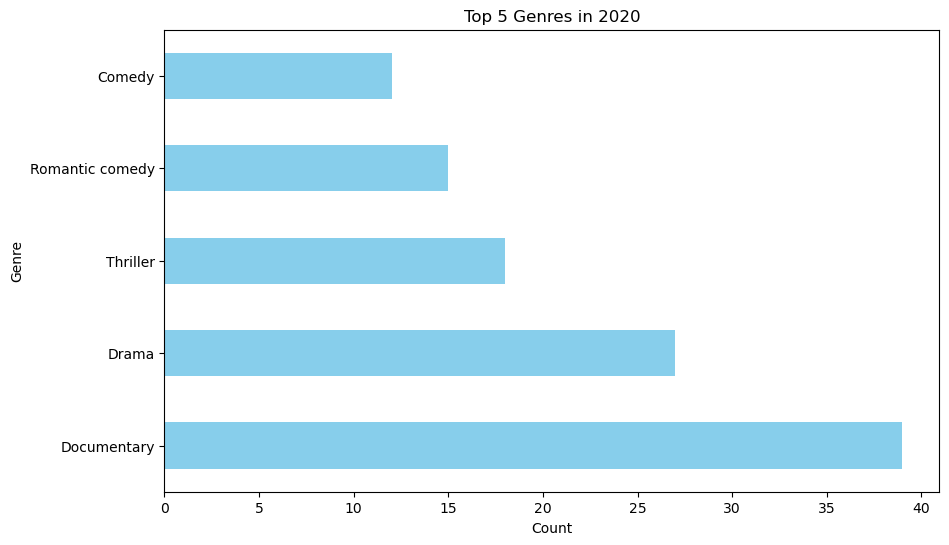

In [43]:
import matplotlib.pyplot as plt

# 2020년에 대한 장르 빈도 계산
genre_counts = df[df["year"] == 2020]["Genre"].value_counts()[:5]

# 수평 막대 그래프 그리기
plt.figure(figsize=(10, 6))
genre_counts.plot(kind='barh', color='skyblue')
plt.title('Top 5 Genres in 2020')
plt.xlabel('Count')
plt.ylabel('Genre')
plt.show()

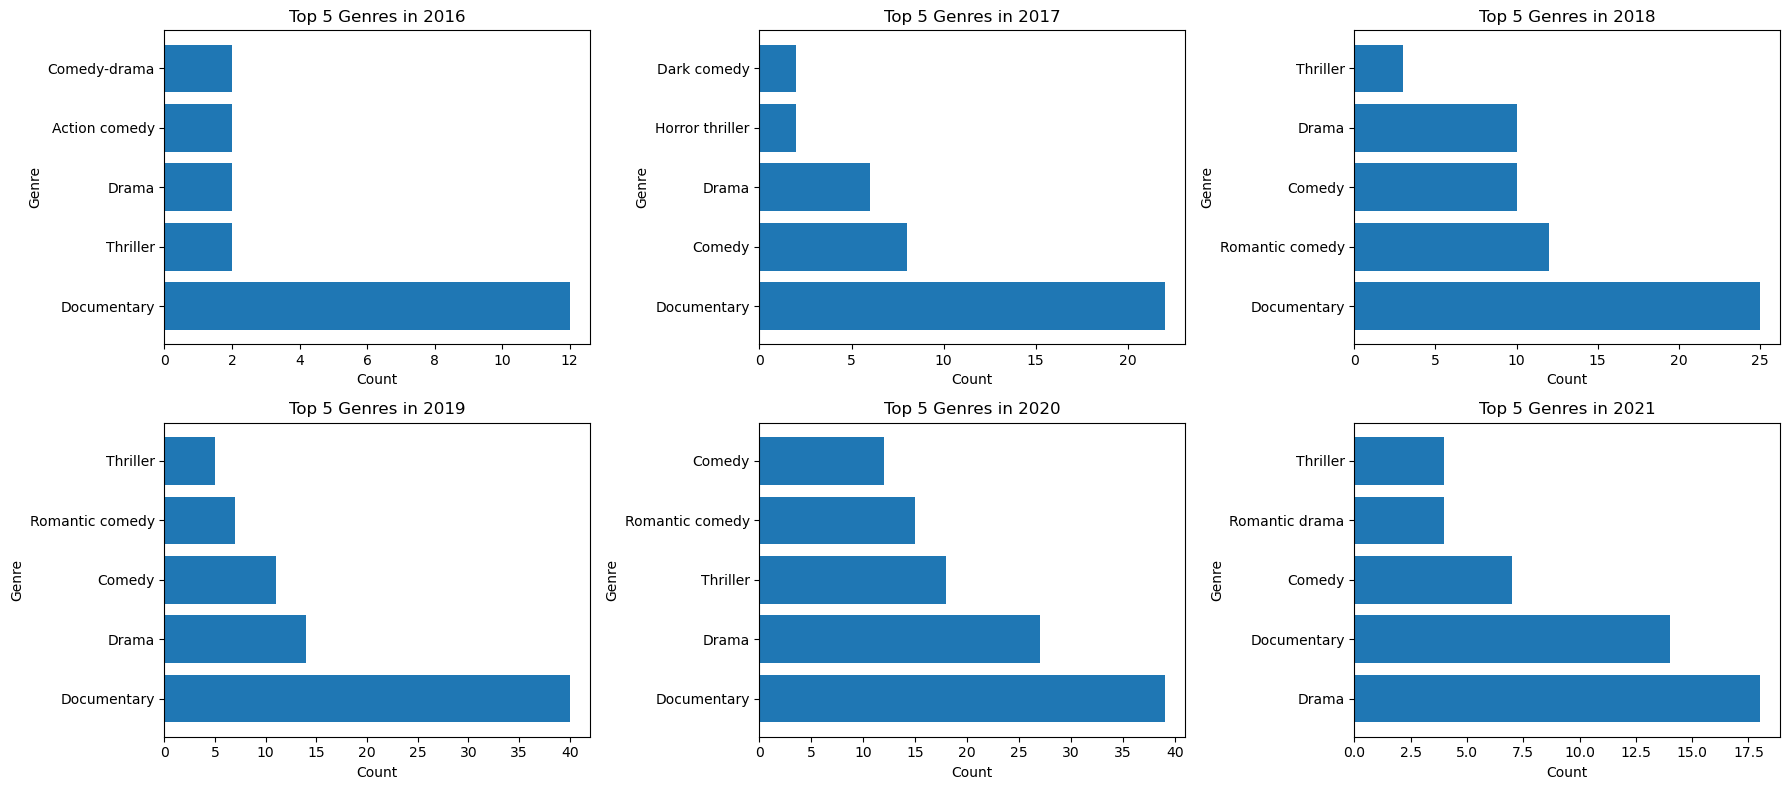

In [57]:
import matplotlib.pyplot as plt

year_list = [2016, 2017, 2018, 2019, 2020, 2021]

# 그래프를 나열할 행과 열의 수 지정
rows = 2
cols = 3

# 그래프 크기 지정
fig, axes = plt.subplots(rows, cols, figsize=(18, 8))

# 각 연도에 대한 그래프 그리기
for i, year in enumerate(year_list):
    # 각 연도에 대한 장르 빈도 계산 및 정렬
    genre_counts = df[df["year"] == year]["Genre"].value_counts().sort_values(ascending=False)[:5]

    # 행과 열 인덱스 계산
    row_idx = i // cols
    col_idx = i % cols

    # 막대 그래프 그리기
    axes[row_idx, col_idx].barh(genre_counts.index, genre_counts.values)
    axes[row_idx, col_idx].set_title(f'Top 5 Genres in {year}')
    axes[row_idx, col_idx].set_xlabel('Count')
    axes[row_idx, col_idx].set_ylabel('Genre')

# 남은 축 비우기
for i in range(len(year_list), rows * cols):
    fig.delaxes(axes.flatten()[i])

# 간격 조절
plt.tight_layout()
plt.show()


In [89]:
df[(df["year"]==2019)]["year"].value_counts()

year
2019    125
Name: count, dtype: int64

In [85]:
df[(df["year"]==2020)]["year"].value_counts()

year
2020    183
Name: count, dtype: int64

In [86]:
# 2020년 상반기 장르별 작품 수
up_month_list = [1,2,3,4,5,6]
df[(df["year"]==2020) & (df["month"].isin(up_month_list))]["year"].value_counts()

year
2020    65
Name: count, dtype: int64

In [87]:
# 2020년 하반기 장르별 작품 수
down_month_list = [7, 8, 9, 10, 11, 12]
df[(df["year"]==2020) & (df["month"].isin(down_month_list))]["year"].value_counts()

year
2020    118
Name: count, dtype: int64

In [88]:
# 2021년 상반기 장르별 작품 수
up_month_list = [1,2,3,4,5,6]
df[(df["year"]==2021) & (df["month"].isin(up_month_list))]["year"].value_counts()

year
2021    71
Name: count, dtype: int64

In [94]:
df_16 = df[(df["year"]==2016)]["year"].value_counts()
df_17 = df[(df["year"]==2017)]["year"].value_counts()
df_18 = df[(df["year"]==2018)]["year"].value_counts()
df_19 = df[(df["year"]==2019)]["year"].value_counts()
df_20 = df[(df["year"]==2020)]["year"].value_counts()
df_21 = df[(df["year"]==2021)]["year"].value_counts()

Text(0, 0.5, 'count')

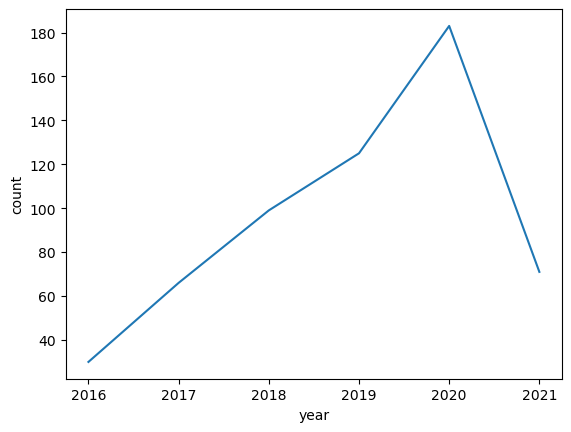

In [97]:
x = [2016, 2017, 2018, 2019, 2020 , 2021] 
y = [df_16,df_17, df_18,df_19,df_20,df_21] 
plt.plot(x, y)
plt.xlabel("year") 
plt.ylabel("count")

In [61]:
df[(df["Genre"]=="Drama") & (df["year"]==2021)].sort_values(by="IMDB Score", ascending=False)

,Title,Genre,Premiere,Runtime,IMDB Score,Language,year,month,weekday
493,The Disciple,Drama,2021-04-30,129,7.2,Marathi,2021,4,4
477,The White Tiger,Drama,2021-01-22,125,7.1,English,2021,1,4
475,The Dig,Drama,2021-01-29,112,7.1,English,2021,1,4
470,Pieces of a Woman,Drama,2021-01-07,126,7.1,English,2021,1,3
369,Blue Miracle,Drama,2021-05-27,95,6.7,English,2021,5,3
383,Paper Lives,Drama,2021-03-12,97,6.7,Turkish,2021,3,4
382,Night in Paradise,Drama,2021-04-09,132,6.7,Korean,2021,4,4
381,Moxie,Drama,2021-03-03,111,6.7,English,2021,3,2
365,Ajeeb Daastaans,Drama,2021-04-16,142,6.7,Hindi,2021,4,4
354,Milestone,Drama,2021-05-07,98,6.6,Hindi,2021,5,4


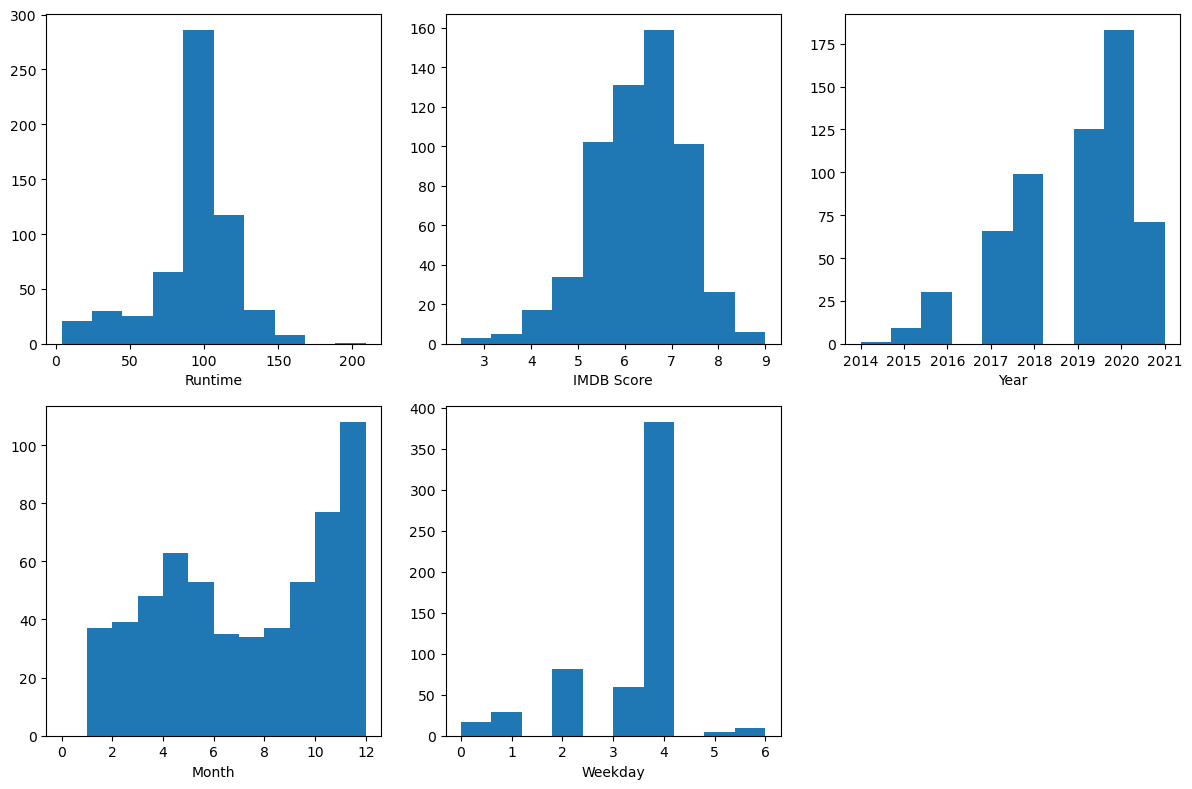

In [41]:
import numpy as np


fig = plt.figure(figsize=(12,8))

ax1 = fig.add_subplot(2,3,1)
ax2 = fig.add_subplot(2,3,2)
ax3 = fig.add_subplot(2,3,3)
ax4 = fig.add_subplot(2,3,4)
ax5 = fig.add_subplot(2,3,5)

ax1.hist(df["Runtime"])
ax1.set_xlabel("Runtime")

ax2.hist(df["IMDB Score"])
ax2.set_xlabel("IMDB Score")

ax3.hist(df["year"])
ax3.set_xlabel("Year")

ax4.hist(df["month"], bins=np.arange(0, 13, 1))
ax4.set_xlabel("Month")

ax5.hist(df["weekday"])
ax5.set_xlabel("Weekday")

fig.tight_layout()
plt.show()

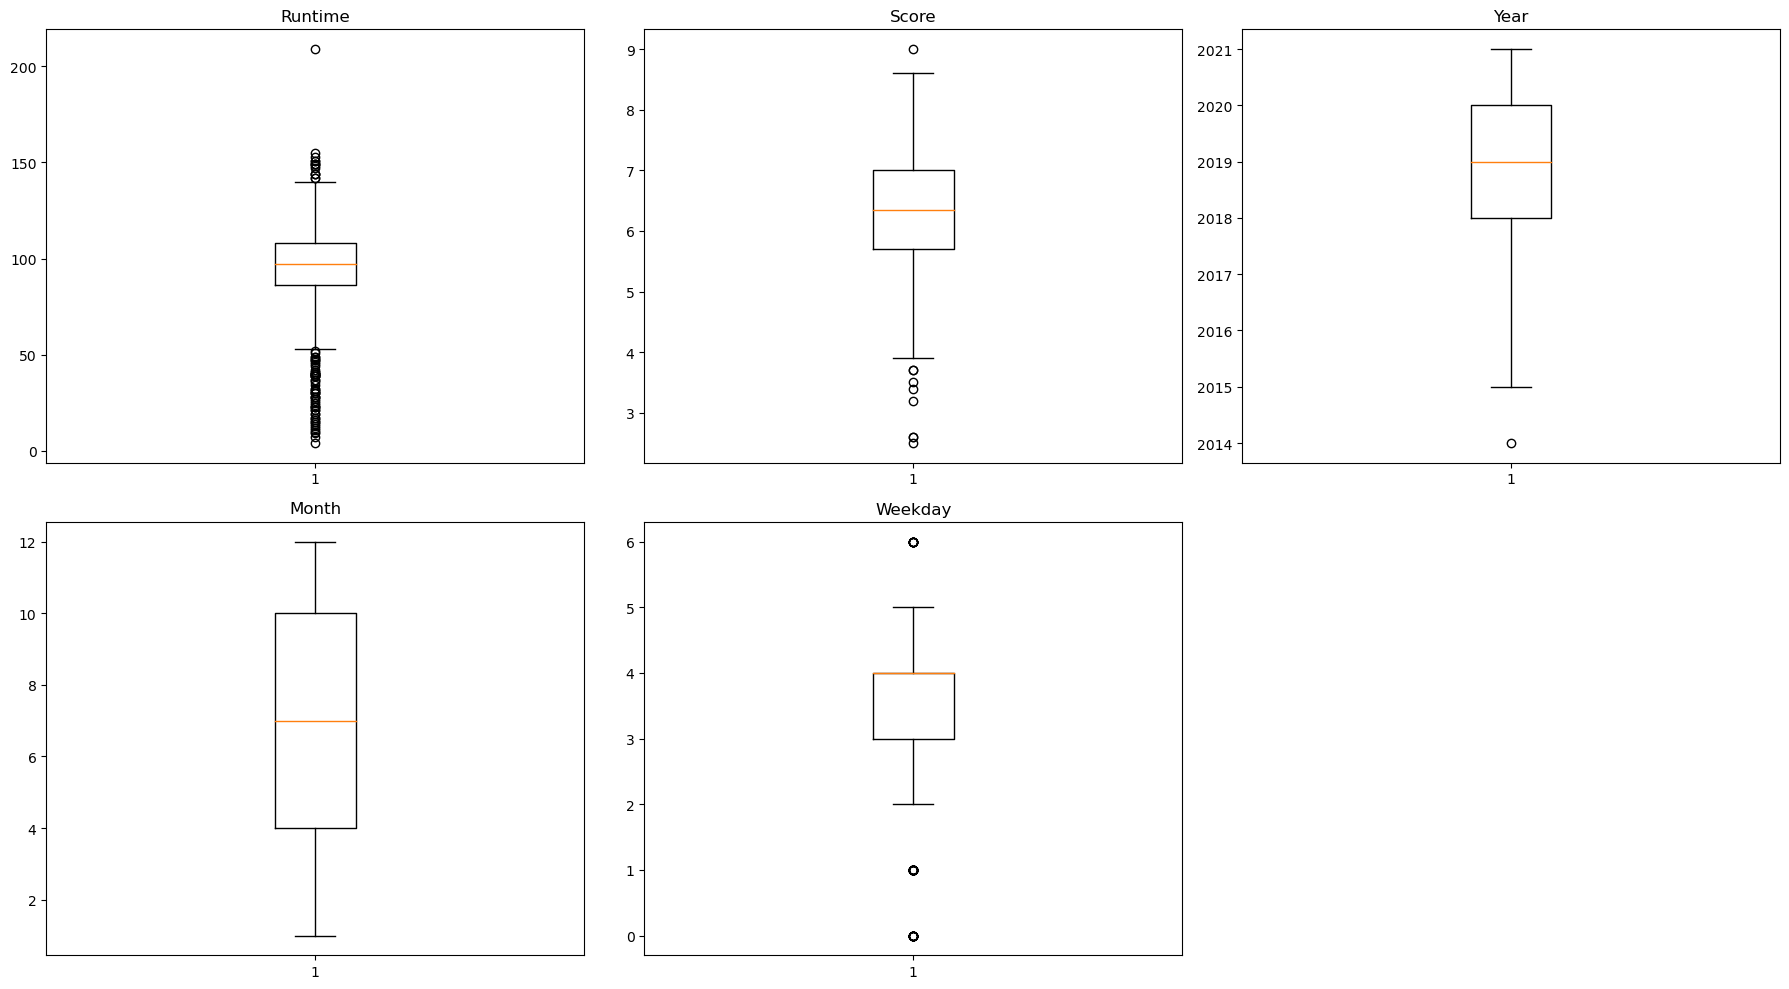

In [98]:
import matplotlib.pyplot as plt

fig, axes = plt.subplots(nrows=2, ncols=3, figsize=(18, 10))

# 각 서브플롯에 대한 데이터와 타이틀 지정
axes[0, 0].boxplot(df["Runtime"])
axes[0, 0].set_title("Runtime")

axes[0, 1].boxplot(df["IMDB Score"])
axes[0, 1].set_title("Score")

axes[0, 2].boxplot(df["year"])
axes[0, 2].set_title("Year")

axes[1, 0].boxplot(df["month"])
axes[1, 0].set_title("Month")

axes[1, 1].boxplot(df["weekday"])
axes[1, 1].set_title("Weekday")

# 불필요한 빈 서브플롯 제거
fig.delaxes(axes[1, 2])

# 간격 조절
fig.tight_layout()
plt.show()


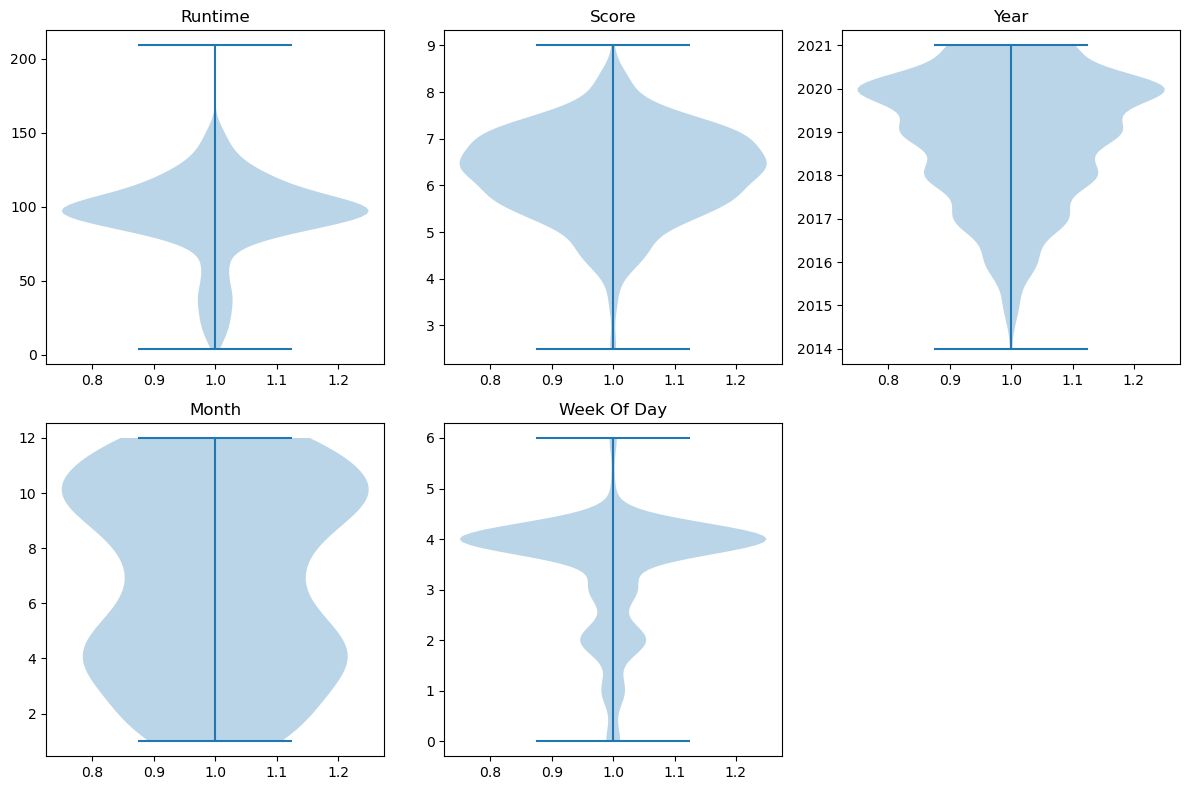

In [15]:
fig = plt.figure(figsize=(12,8))

ax1 = fig.add_subplot(2,3,1)
ax2 = fig.add_subplot(2,3,2)
ax3 = fig.add_subplot(2,3,3)
ax4 = fig.add_subplot(2,3,4)
ax5 = fig.add_subplot(2,3,5)

ax1.violinplot(df["Runtime"])
ax2.violinplot(df["IMDB Score"])
ax3.violinplot(df["year"])
ax4.violinplot(df["month"])
ax5.violinplot(df["weekday"])

ax1.set_title("Runtime")
ax2.set_title("Score")
ax3.set_title("Year")
ax4.set_title("Month")
ax5.set_title("Week Of Day")

fig.tight_layout()
plt.show()

# >> Runtime: 100분에 몰려있음
# >> Score: 6-7점 사이에 가장 몰려있음
# >> Month: 4, 10월에 개봉작이 많고 1, 6-8월에 개봉작이 가장 적음
# >> Week Of Day: 금요일(4)에 가장 많이 개봉함

<Axes: xlabel='Runtime', ylabel='IMDB Score'>

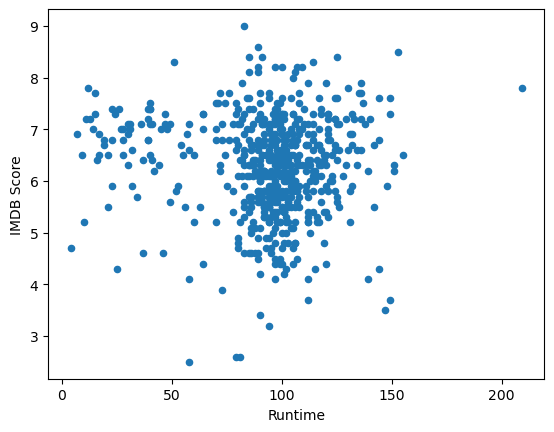

In [16]:
# runtime - score
df.plot(kind="scatter", x="Runtime", y="IMDB Score")

# >> runtime - score 사이에 상관관계가는 없어보임...

<Axes: >

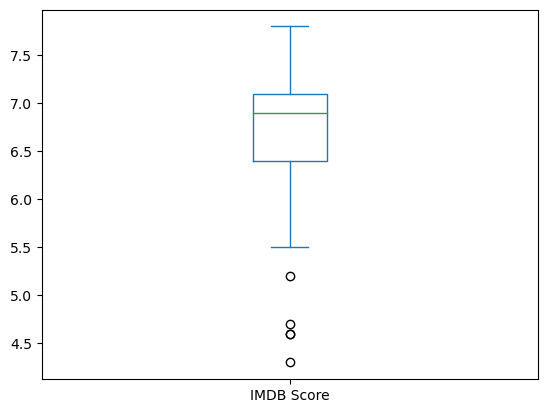

In [45]:
df[df["Runtime"] <= 50]["IMDB Score"].plot(kind="box")

<Axes: >

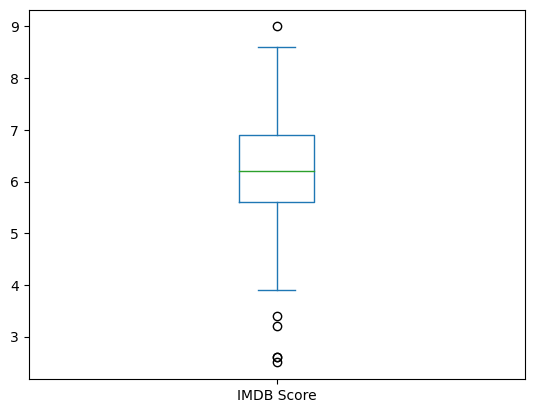

In [49]:
df[(df["Runtime"] <= 100) & (df["Runtime"]>50)]["IMDB Score"].plot(kind="box")

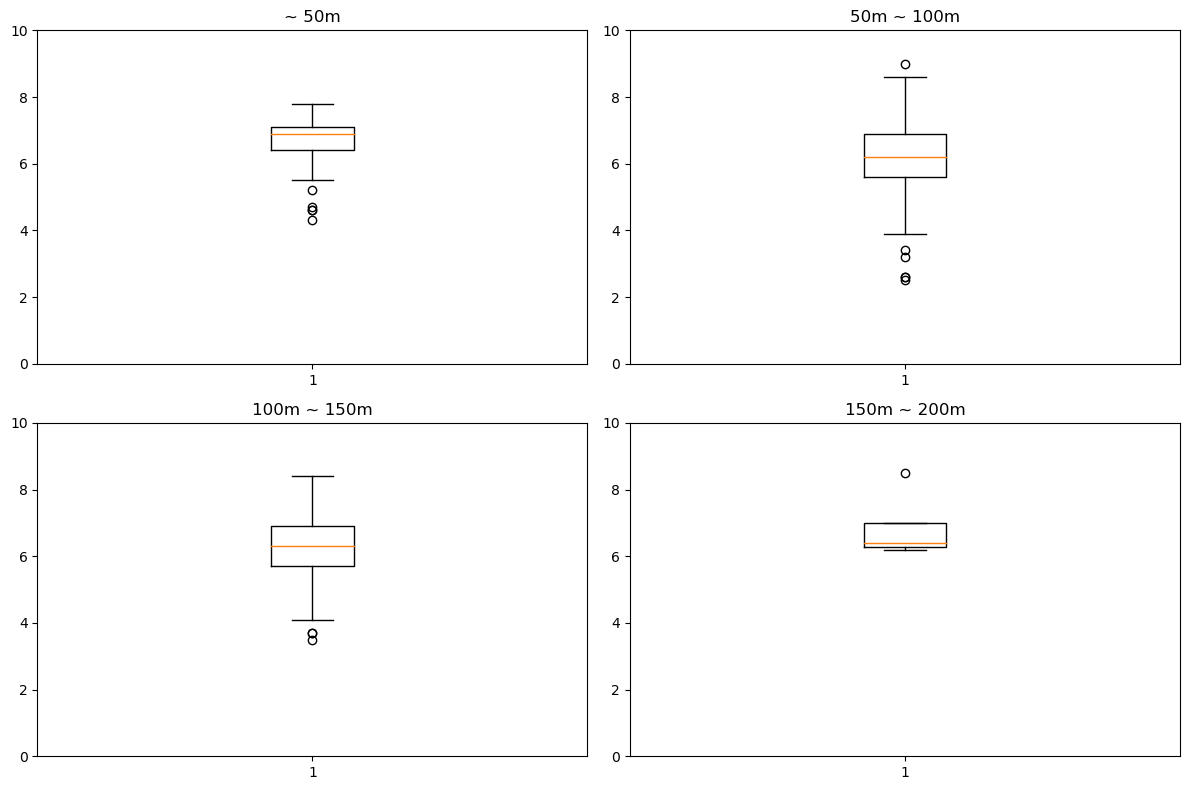

In [58]:
fig = plt.figure(figsize=(12,8))

ax1 = fig.add_subplot(2,2,1)
ax2 = fig.add_subplot(2,2,2)
ax3 = fig.add_subplot(2,2,3)
ax4 = fig.add_subplot(2,2,4)

ax1.boxplot(df[df["Runtime"] <= 50]["IMDB Score"])
ax2.boxplot(df[(df["Runtime"] <= 100) & (df["Runtime"]>50)]["IMDB Score"])
ax3.boxplot(df[(df["Runtime"] <= 150) & (df["Runtime"]>100)]["IMDB Score"])
ax4.boxplot(df[(df["Runtime"] <= 200) & (df["Runtime"]>150)]["IMDB Score"])

ax1.set_title("~ 50m")
ax2.set_title("50m ~ 100m")
ax3.set_title("100m ~ 150m")
ax4.set_title("150m ~ 200m")

list = [ax1, ax2, ax3, ax4]
for ax in list:
    ax.set_ylim(0,10)

fig.tight_layout()
plt.show()


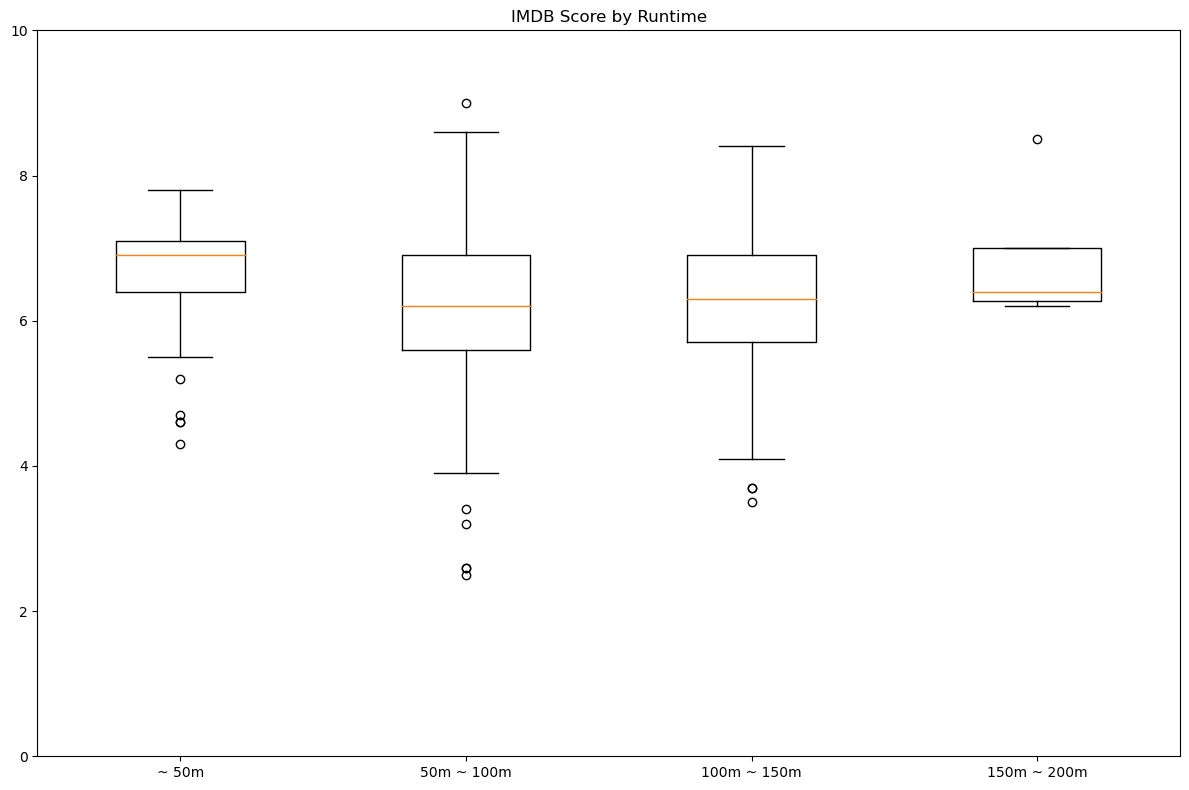

In [59]:
import numpy as np
import matplotlib.pyplot as plt

fig, ax = plt.subplots(figsize=(12, 8))

# 각 상자그림의 위치 지정
positions = [1, 2, 3, 4]

# 각 상자그림 그리기
ax.boxplot([
    df[df["Runtime"] <= 50]["IMDB Score"],
    df[(df["Runtime"] <= 100) & (df["Runtime"] > 50)]["IMDB Score"],
    df[(df["Runtime"] <= 150) & (df["Runtime"] > 100)]["IMDB Score"],
    df[(df["Runtime"] <= 200) & (df["Runtime"] > 150)]["IMDB Score"]
], positions=positions)

# x축 레이블 지정
ax.set_xticks(positions)
ax.set_xticklabels(["~ 50m", "50m ~ 100m", "100m ~ 150m", "150m ~ 200m"])

ax.set_ylim(0, 10)
ax.set_title("IMDB Score by Runtime")

fig.tight_layout()
plt.show()

In [17]:
df[["Runtime","IMDB Score"]].corr()

# >> runtime-score 사이에 유의미한 상관관계 없음

,Runtime,IMDB Score
Runtime,1.000000,-0.040896
IMDB Score,-0.040896,1.000000


<Axes: xlabel='year', ylabel='IMDB Score'>

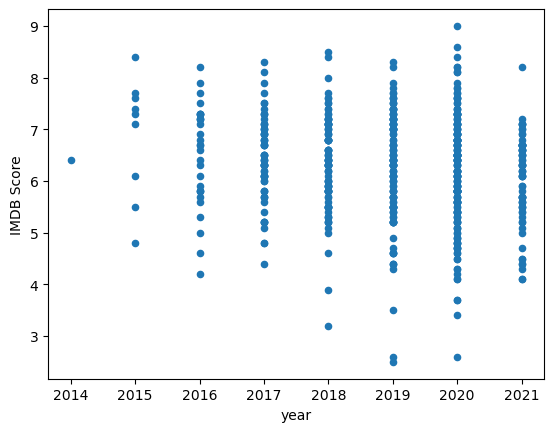

In [286]:
# year - score
df.plot(kind="scatter", x="year", y="IMDB Score")

<Axes: xlabel='month', ylabel='IMDB Score'>

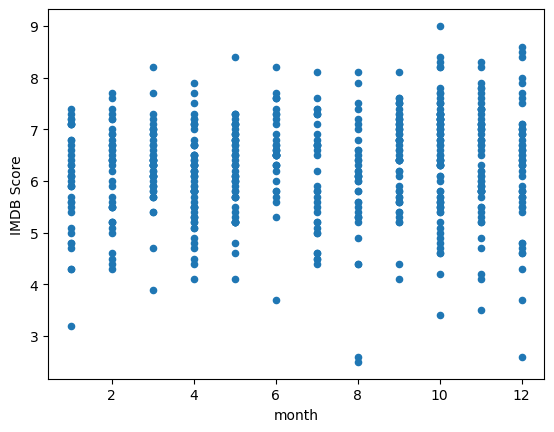

In [287]:
# month - score
df.plot(kind="scatter", x="month", y="IMDB Score")

<Axes: xlabel='weekday', ylabel='IMDB Score'>

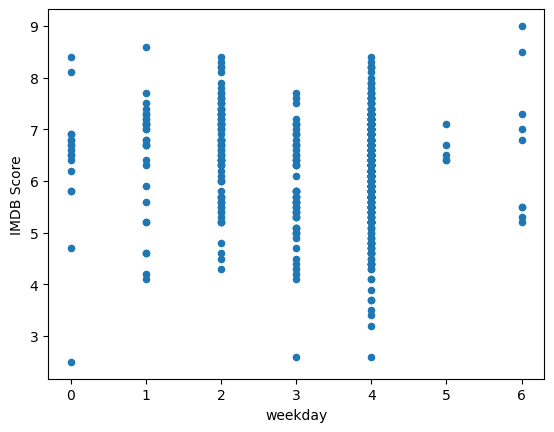

In [288]:
# weekday - score
df.plot(kind="scatter", x="weekday", y="IMDB Score")

# >> 수요일, 금요일에 개봉한 작품의 점수가 다른 요일에 비해 높음

In [238]:
# df["Genre_top10"] = df["Genre"].value_counts()[:10]

In [241]:
# df = df.drop(["Genre_top10"],axis=1)

In [248]:
# df

In [244]:
df["Genre"].value_counts()[:10]

Genre
Documentary        159
Drama               77
Comedy              49
Romantic comedy     39
Thriller            33
Comedy-drama        14
Crime drama         11
Biopic               9
Horror               9
Action               7
Name: count, dtype: int64

In [18]:
df[df["Genre"]=="Horror"]

,Title,Genre,Premiere,Runtime,IMDB Score,Language,year,month,weekday
31,I Am the Pretty Thing That Lives in the House,Horror,2016-10-28,89,4.6,English,2016,10,4
34,Rattlesnake,Horror,2019-10-25,85,4.6,English,2019,10,4
46,Nobody Sleeps in the Woods Tonight,Horror,2020-10-28,103,4.8,Polish,2020,10,2
59,Cadaver,Horror,2020-10-22,86,5.1,Norwegian,2020,10,3
71,Ghost Lab,Horror,2021-05-26,117,5.2,Thai,2021,5,2
90,Things Heard & Seen,Horror,2021-04-29,121,5.3,English,2021,4,3
101,In the Tall Grass,Horror,2019-10-04,101,5.4,English,2019,10,4
146,Eli,Horror,2019-10-18,98,5.7,English,2019,10,4
348,Bulbbul,Horror,2020-06-24,94,6.6,Hindi,2020,6,2


In [19]:
list = ["Thriller", "Horror", "Zombie"]
df[(df["month"]==10) & ((df["Genre"]=="Thriller") | (df["Genre"]=="Horror") | (df["Genre"]=="Zombie/Heist"))]

# 전체 9개의 호러영화 중에 6개가 10월에 개봉함
# >> 아마도 할로윈의 영향이 아닐까- 추측해볼 수 있음

,Title,Genre,Premiere,Runtime,IMDB Score,Language,year,month,weekday
31,I Am the Pretty Thing That Lives in the House,Horror,2016-10-28,89,4.6,English,2016,10,4
34,Rattlesnake,Horror,2019-10-25,85,4.6,English,2019,10,4
46,Nobody Sleeps in the Woods Tonight,Horror,2020-10-28,103,4.8,Polish,2020,10,2
59,Cadaver,Horror,2020-10-22,86,5.1,Norwegian,2020,10,3
101,In the Tall Grass,Horror,2019-10-04,101,5.4,English,2019,10,4
146,Eli,Horror,2019-10-18,98,5.7,English,2019,10,4
298,Fractured,Thriller,2019-10-11,100,6.4,English,2019,10,4
332,His House,Thriller,2020-10-30,93,6.5,English,2020,10,4


In [40]:
df[df["year"]==2020].sort_values(by="IMDB Score", ascending=False)

,Title,Genre,Premiere,Runtime,IMDB Score,Language,year,month,weekday
583,David Attenborough: A Life on Our Planet,Documentary,2020-10-04,83,9.0,English,2020,10,6
582,Emicida: AmarElo - It's All For Yesterday,Documentary,2020-12-08,89,8.6,Portuguese,2020,12,1
578,Ben Platt: Live from Radio City Music Hall,Concert Film,2020-05-20,85,8.4,English,2020,5,2
575,The Three Deaths of Marisela Escobedo,Documentary,2020-10-14,109,8.2,Spanish,2020,10,2
572,Disclosure: Trans Lives on Screen,Documentary,2020-06-19,107,8.2,English,2020,6,4
...,...,...,...,...,...,...,...,...,...
12,Whipped,Romantic comedy,2020-09-18,97,4.1,Indonesian,2020,9,4
6,Leyla Everlasting,Comedy,2020-12-04,112,3.7,Turkish,2020,12,4
7,The Last Days of American Crime,Heist film/Thriller,2020-06-05,149,3.7,English,2020,6,4
4,Kaali Khuhi,Mystery,2020-10-30,90,3.4,Hindi,2020,10,4


In [139]:
genre_mean_scores = df.groupby("Genre")["IMDB Score"].mean()
top_genres = genre_mean_scores.sort_values(ascending=False).head(10)
down_genres = genre_mean_scores.sort_values(ascending=False).tail(10)

In [140]:
top_genres

Genre
Animation/Christmas/Comedy/Adventure    8.200000
Musical / Short                         7.700000
Concert Film                            7.633333
Anthology/Dark comedy                   7.600000
Animation / Science Fiction             7.500000
Making-of                               7.450000
Action-adventure                        7.300000
Historical drama                        7.200000
Coming-of-age comedy-drama              7.200000
Drama-Comedy                            7.200000
Name: IMDB Score, dtype: float64

In [141]:
down_genres

Genre
Horror thriller            4.700000
Anime / Short              4.700000
Mystery                    4.650000
Romance drama              4.600000
Science fiction/Drama      4.533333
Superhero-Comedy           4.400000
Political thriller         4.300000
Horror anthology           4.300000
Musical/Western/Fantasy    3.900000
Heist film/Thriller        3.700000
Name: IMDB Score, dtype: float64

In [124]:
df[["Genre", "IMDB Score"]].sort_values(by="IMDB Score", ascending=False).drop_duplicates(["Genre"])[:10]

,Genre,IMDB Score
583,Documentary,9.0
581,One-man show,8.5
579,Concert Film,8.4
573,Animation/Christmas/Comedy/Adventure,8.2
565,Drama,7.9
561,Crime drama,7.8
560,Animation / Short,7.8
552,Musical / Short,7.7
553,War drama,7.7
558,Making-of,7.7


In [126]:
# df["IMDB Score"].sort_values(ascending=False)

In [125]:
# df["Genre"].value_counts()[:10]

In [101]:
df[df["Genre"]=="Comedy"]["IMDB Score"].mean()

5.506122448979592

In [103]:
df[df["Genre"]=="Drama"]["IMDB Score"].mean()

6.342857142857143

In [99]:
df[df["Genre"]=="Documentary"]["IMDB Score"].mean()

6.936477987421385

In [51]:
df.groupby(["Language"])

In [45]:
df.groupby(["Language"])[["IMDB Score", "Runtime"]].mean()

,IMDB Score,Runtime
Language,,
Bengali,7.100000,41.000000
Dutch,5.800000,99.666667
English,6.380050,91.817955
English/Akan,7.700000,136.000000
English/Arabic,7.300000,114.000000
English/Hindi,7.300000,32.500000
English/Japanese,4.400000,89.000000
English/Korean,7.300000,121.000000
English/Mandarin,7.050000,59.000000


In [54]:
df["Language"].value_counts()[:10]

Language
English       401
Hindi          33
Spanish        31
French         20
Italian        14
Portuguese     12
Indonesian      9
Japanese        6
Korean          6
German          5
Name: count, dtype: int64

In [55]:
df[df["Language"]=="Georgian"]

,Title,Genre,Premiere,Runtime,IMDB Score,Language,year,month,weekday
410,The Trader,Documentary,2018-02-09,23,6.8,Georgian,2018,2,4


In [78]:
df.groupby(["Genre"])["Runtime"].mean()

Genre
Action              108.000000
Action comedy       101.200000
Action thriller      82.000000
Action-adventure    121.000000
Action-thriller     119.666667
                       ...    
War                 110.500000
War drama           145.500000
War-Comedy          122.000000
Western             116.666667
Zombie/Heist        148.000000
Name: Runtime, Length: 115, dtype: float64

In [ ]:
<의외인 점>
힌디어 2위 => 인구수, 자본에 근거했을 것이다
영어작품에 다큐가 대부분, 근데 한국은 드라마가 강세 => 아무래도 문화적 차이가 아닌가...다양한 걸 시도하는 문화? 아니면 자본일 수도..
        -> 혹시,,,,서양권은 불륜과 같은 주제에 별 감흥?이 없어서 그런 게 아닌가
        -> 문화적 차이가 맞는듯ㅇㅇ(+기사 첨부하면 좋을 듯)
        -> 그리고 교육환경의 차이?인 것 같기도 함
장르 => 서양권은 다큐가 많고, 보수국가에서는 드라마가 많다 -> 약간 도파민에 중독되다 못해 절여진 뇌 때문이지 않을까..자극적인 주제에 대한 문화적 차이이지 않을까 예상함
        -> +) 공중파에서는 내보내지 못하는 제약사항들이 OTT 플랫폼에서는 제약사항이 희미해지기때문에 그런게 아닐까
요일 => 금요일에 많이 개봉하는 이유? -> 미국 기준으로 하면 토요일이긴 함
호러 => 한국 기준으로 여름(6-8월)에 많이 나올 거라고 예상했는데 10월에 가장 많았음
        -> 서양은 할로윈을 챙기니까 10월에 호러 영화가 많이 나온게 아닌가 예상함
개봉작 수 => 20년에비해 21년에 개봉한 작품수는 절반 이상 차이남 -> 21년 6월까지 집계한 데이터라 하반기 개봉은 들어가지 않았음(근데 그래도 20년 개봉수는 못 따라갈 듯?)

아쉬운점 -> 2년 전에 업데이트가 끝난 데이터라 한국 데이터가 너무 부족함ㅠ

In [ ]:
<t-test 주제>
- 19년도와 20년도 런타임 평균 차이 => 차이가 있다
- 19년도와 20년도 점수 평균 차이  => 차이가 없다

- 영어 - 힌디 점수 평균 차이 => 차이가 있다
- 영어 - 힌디 런타임 평균 차이 => 차이가 있다

- 다큐 - 드라마 런타임/점수 평균 차이 => 
- 상/하반기 점수 평균 차이

### t-test

In [ ]:
<t-test 주제>
- 다큐 - 드라마 런타임/점수 평균 차이 => 둘 다 차이가 있다고 나옴
=> (런타임) 다큐 < 드라마
=> (점수) 다큐 > 드라마

- 상/하반기 점수 평균 차이

## 1.
### 가설 설정
유의수준 = 0.05

귀무가설: 다큐 런타임 평균 == 드라마 런타임 평균 
 => 두 집단의 런타임 평균 차이 = 0

대립가설: 다큐 런타임 평균 != 드라마 런타임 평균(양측)
 => 두 집단의 런타임 평균 차이 != 0

In [20]:
# 다큐 런타임 평균
df[df["Genre"]=="Documentary"]["Runtime"].mean()

78.9622641509434

In [21]:
# 드라마 런타임 평균
df[df["Genre"]=="Drama"]["Runtime"].mean()

107.31168831168831

#### 등분산 검정

H0: 두 집단의 분산이 같다.
H1: 두 집단의 분산이 다르다.

In [10]:
from scipy import stats

In [11]:
docu_runtime = df[df["Genre"] == "Documentary"]["Runtime"]
drama_runtime = df[df["Genre"] == "Drama"]["Runtime"]

In [27]:
statistic, pvalue = stats.levene(docu_runtime, drama_runtime)
if pvalue > 0.05:
    print(f"pvalue: {pvalue} 등분산 가정 만족")
else:
    print(f"pvalue: {pvalue} 이분산 가정 만족")
    
# p-value가 0.0005로 유의수준 0.05보다 작기때문에 귀무가설(등분산 만족)을 기각하고 두 집단의 분산이 다르다고 결정한다.

pvalue: 0.0005178983566953908 이분산 가정 만족


In [28]:
# 이분산 two-sample t-test

t_statistic, p_value = stats.ttest_ind(
    a=docu_runtime,
    b=drama_runtime,
    alternative="two-sided",
    equal_var=False
)
print(f"t통계량: {t_statistic}, p-value: {p_value}")

# p-value = 0.00000006892

t통계량: -9.446854830954212, p-value: 4.5251893625345756e-18


In [29]:
if p_value < 0.05:
        print(p_value, "귀무가설 기각")
else:
    print(p_value, "귀무가설 기각 불가")

# >> 다큐와 드라마 런타임 평균에는 차이가 있다!

4.5251893625345756e-18 귀무가설 기각


In [12]:
# # 단측 검정

# H0: 두 집단의 Runtime 평균이 같다
# H1: 드라마 runtime 평균 > 다큐 runtime 평균

In [15]:
# 단측
t_statistic, p_value = stats.ttest_ind(
    a=drama_runtime,
    b=docu_runtime,
    alternative="greater",
    equal_var=False
)
print(f"t통계량: {t_statistic}, p-value: {p_value}")
if p_value < 0.05:
        print(p_value, "귀무가설 기각")
else:
    print(p_value, "귀무가설 기각 불가")

# 유의확률 0.00000003447 => 귀무가설 기각, 대립가설 채택
# >> 드라마 runtime 평균이 다큐 runtime 평균보다 통계적으로 길다고 할 수 있다.

t통계량: 9.446854830954212, p-value: 2.2625946812672878e-18
2.2625946812672878e-18 귀무가설 기각


## 2.
### 가설 설정
유의수준 = 0.05

귀무가설: 다큐 IMDB Score 평균 == 드라마 Score 평균
 => 두 집단의 Score 평균 차이 = 0

대립가설: 다큐 Score 평균 != 드라마 Score 평균(양측)
 => 두 집단의 Score 평균 차이 != 0

#### 등분산 검정

H0: 두 집단의 분산이 같다.
H1: 두 집단의 분산이 다르다.

In [16]:
docu_scores = df[df["Genre"] == "Documentary"]["IMDB Score"]
drama_scores = df[df["Genre"] == "Drama"]["IMDB Score"]

In [32]:
statistic, pvalue = stats.levene(docu_scores, drama_scores)
if pvalue > 0.05:
    print(f"pvalue: {pvalue} 등분산 가정 만족")
else:
    print(f"pvalue: {pvalue} 이분산 가정 만족")
    
# p-value가 0.743으로 유의수준 0.05보다 크기때문에 귀무가설(등분산)을 채택한다.

pvalue: 0.74261784155308 등분산 가정 만족


In [18]:
# 등분산 two-sample t-test

t_statistic, p_value = stats.ttest_ind(
    a=docu_scores,
    b=drama_scores,
    alternative="two-sided",
    equal_var=True
)
print(f"t통계량: {t_statistic}, p-value: {p_value}")

if p_value < 0.05:
        print(p_value, "귀무가설 기각")
else:
    print(p_value, "귀무가설 기각 불가")

# p-value = 0.00000737899 => 귀무가설 기각
# >> 두 집단의 IMDB Score 평균 점수의 차는 0이 아니다. => 두 집단의 Score 평균에는 차이가 있다.

t통계량: 5.2295343458734544, p-value: 3.767793451079555e-07
3.767793451079555e-07 귀무가설 기각


In [17]:
## 단측검정

# H0: 다큐 Score 평균 = 드라마 Score 평균
# H1: 다큐 Score 평균 > 드라마 Score 평균

In [19]:
t_statistic, p_value = stats.ttest_ind(
    a=docu_scores,
    b=drama_scores,
    alternative="greater",
    equal_var=True
)
print(f"t통계량: {t_statistic}, p-value: {p_value}")

if p_value < 0.05:
        print(p_value, "귀무가설 기각")
else:
    print(p_value, "귀무가설 기각 불가")
    
# 유의확률 = 0.00
# >> 다큐 평균 Score가 드라마 평균 Score 보다 통계적으로 높다고 할 수 있다.

t통계량: 5.2295343458734544, p-value: 1.8838967255397774e-07
1.8838967255397774e-07 귀무가설 기각


## 3.
### 가설 설정
유의수준 = 0.05

귀무가설: 상반기 Score 평균 == 하반기 Score 평균
 => 두 집단의 Score 평균 차이 = 0

대립가설: 상반기 Score 평균 != 하반기 Score 평균(양측)
 => 두 집단의 Score 평균 차이 != 0

In [51]:
# 상반기 평균 점수
up_score = df[df["month"].isin([1, 2, 3, 4, 5, 6])]["IMDB Score"]
up_score

3      3.2
7      3.7
8      3.9
9      4.1
10     4.1
      ... 
558    7.7
563    7.9
572    8.2
574    8.2
578    8.4
Name: IMDB Score, Length: 275, dtype: float64

In [22]:
df["Genre"].value_counts()

Genre
Documentary                             159
Drama                                    77
Comedy                                   49
Romantic comedy                          39
Thriller                                 33
                                       ... 
Romantic comedy-drama                     1
Heist film/Thriller                       1
Musical/Western/Fantasy                   1
Horror anthology                          1
Animation/Christmas/Comedy/Adventure      1
Name: count, Length: 115, dtype: int64

In [25]:
df[df["month"].isin([1, 2, 3, 4, 5, 6])]["weekday"].value_counts()

weekday
4    190
2     38
3     29
1      8
0      4
6      3
5      3
Name: count, dtype: int64

In [52]:
# 하반기 평균 점수
down_score = df[df["month"].isin([7,8,9,10,11,12])]["IMDB Score"]
down_score

0      2.5
1      2.6
2      2.6
4      3.4
5      3.5
      ... 
579    8.4
580    8.4
581    8.5
582    8.6
583    9.0
Name: IMDB Score, Length: 309, dtype: float64

In [53]:
from scipy import stats

# 등분산 검정
statistic, pvalue = stats.levene(up_score, down_score)
if pvalue > 0.05:
    print(f"pvalue: {pvalue} 등분산 가정 만족")
else:
    print(f"pvalue: {pvalue} 이분산 가정 만족")
    
# p-value가 0.0003으로 유의수준 0.05보다 작기때문에 귀무가설을 기각하고 대립가설(두 집단 분산이 다르다)을 채택한다.

pvalue: 0.00027820936393294223 이분산 가정 만족


In [56]:
# 이분산 two-sample t-test
t_statistic, p_value = stats.ttest_ind(
    a=up_score,
    b=down_score,
    alternative="two-sided",
    equal_var=False
)
print(f"t통계량: {t_statistic}, p-value: {p_value}")

if p_value < 0.05:
        print(p_value, "귀무가설 기각")
else:
    print(p_value, "귀무가설 기각 불가")

# p-value가 0.091로 유의수준 0.05보다 크기때문에 귀무가설을 기각할 수 없다.
# >> 상반기 IMDB Score 평균과 하반기 Score 평균의 차이는 없다고 할 수 있다.

t통계량: -1.6948730233128375, p-value: 0.09064085359316686
0.09064085359316686 귀무가설 기각 불가


In [ ]:
# 50분 미만인 작품의 평균 Score == 50~100분인 작품의 평균 Score

In [ ]:
# 50분 미만인 작품의 평균 Score == 100~150분인 작품의 평균 Score